# MINOR PROJECT 

***

## Used Car Price Prediction  

Given *data about used cars*, let's try to predict the **price** of a given car.  
  
We will use linear regression and gradient boosting (LightGBM) to make our predictions.

# Getting Started

In [4]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import lightgbm as lgb

from sklearn.metrics import mean_squared_error

In [30]:
data = pd.read_csv('/kaggle/input/used-car-price-dataset/used_car_dataset.csv')

In [31]:
data

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


# Preprocessing

In [34]:
data.isna().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [9]:
null_columns = data.columns[data.isna().mean() > 0.25]

data = data.drop(null_columns, axis=1)

In [35]:
data

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


In [37]:
data

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


In [38]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'car_name': 946,
 'car_price_in_rupees': 811,
 'kms_driven': 1628,
 'fuel_type': 8,
 'city': 16}

In [39]:
data = data.drop('kms_driven', axis=1)

In [47]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [49]:
data = onehot_encode(
    data,
    ['car_name', 'car_price_in_rupees', 'fuel_type', 'city'],
    ['cname', 'price', 'fname', 'state']
)

In [50]:
data

,year_of_manufacture,cname_Audi A3 35 TDI Premium + Sunroof,cname_Audi A3 35 TDI Premium Plus,cname_Audi A3 35 TDI Premium Plus + Sunroof,cname_Audi A3 35 TDI Technology + Sunroof,cname_Audi A3 35 TFSI Premium Plus,cname_Audi A3 40 TFSI Premium,cname_Audi A3 40 TFSI Premium Plus + sunroof,cname_Audi A4 2.0 TDI (143 bhp),cname_Audi A4 2.0 TDI (143bhp),...,state_Gurgaon,state_Hyderabad,state_Kolkata,state_Mumbai,state_Noida,state_Pallikarnai,state_Poonamallee,state_Pune,state_Thane,state_Thiruvallur
0,2016,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2019,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2019,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,2015,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2101,2013,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2102,2018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2103,2017,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
data.isna().sum().sum()

0

# Splitting and Scaling

In [54]:
y = data.loc[:, 'year_of_manufacture']
X = data.drop('year_of_manufacture', axis=1)

In [77]:
data

,year_of_manufacture,cname_Audi A3 35 TDI Premium + Sunroof,cname_Audi A3 35 TDI Premium Plus,cname_Audi A3 35 TDI Premium Plus + Sunroof,cname_Audi A3 35 TDI Technology + Sunroof,cname_Audi A3 35 TFSI Premium Plus,cname_Audi A3 40 TFSI Premium,cname_Audi A3 40 TFSI Premium Plus + sunroof,cname_Audi A4 2.0 TDI (143 bhp),cname_Audi A4 2.0 TDI (143bhp),...,state_Gurgaon,state_Hyderabad,state_Kolkata,state_Mumbai,state_Noida,state_Pallikarnai,state_Poonamallee,state_Pune,state_Thane,state_Thiruvallur
0,2016,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2019,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2019,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,2015,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2101,2013,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2102,2018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2103,2017,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=34)

# Training

In [57]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

lin_y_preds = lin_model.predict(X_test)

In [58]:
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    n_estimators=100,
    reg_lambda=1.0
)

lgb_model.fit(X_train, y_train)

lgb_y_preds = lgb_model.predict(X_test)

In [59]:
lin_loss = np.sqrt(mean_squared_error(y_test, lin_y_preds))
lgb_loss = np.sqrt(mean_squared_error(y_test, lgb_y_preds))

In [79]:
print(data.columns)

Index(['year_of_manufacture', 'cname_Audi A3 35 TDI Premium + Sunroof',
       'cname_Audi A3 35 TDI Premium Plus',
       'cname_Audi A3 35 TDI Premium Plus + Sunroof',
       'cname_Audi A3 35 TDI Technology + Sunroof',
       'cname_Audi A3 35 TFSI Premium Plus', 'cname_Audi A3 40 TFSI Premium',
       'cname_Audi A3 40 TFSI Premium Plus + sunroof',
       'cname_Audi A4 2.0 TDI (143 bhp)', 'cname_Audi A4 2.0 TDI (143bhp)',
       ...
       'state_Gurgaon', 'state_Hyderabad', 'state_Kolkata', 'state_Mumbai',
       'state_Noida', 'state_Pallikarnai', 'state_Poonamallee', 'state_Pune',
       'state_Thane', 'state_Thiruvallur'],
      dtype='object', length=1782)


In [ ]:
These two lines of code calculate and print the Root Mean Squared Error (RMSE) for two different models:
a Linear Regression model (lin_loss) and a Gradient Boosted model (lgb_loss).
    
RMSE is a measure of the average magnitude of the errors between predicted and actual values.
Lower RMSE values indicate better model performance in terms of prediction accuracy.

In [71]:
print("Linear Regression RMSE:", lin_loss)
print("Gradient Boosted RMSE:", lgb_loss)

Linear Regression RMSE: 340159668607913.44
Gradient Boosted RMSE: 2.86068559927202


In [ ]:
These two lines of code calculate and print the R-squared scores for two different models (linear regression and gradient boosted) on a test dataset.
The R-squared score measures the proportion of the variance in the dependent variable that is predictable from the independent variables in a regression model.
Higher R-squared scores indicate a better fit of the model to the data.

In [61]:
print("Linear Regression R^2 Score:", lin_model.score(X_test, y_test))
print("Gradient Boosted R^2 Score:", lgb_model.score(X_test, y_test))

Linear Regression R^2 Score: -1.3682711338193156e+28
Gradient Boosted R^2 Score: 0.03228653313268315


In [ ]:
EVALUATION OF THE MODEL

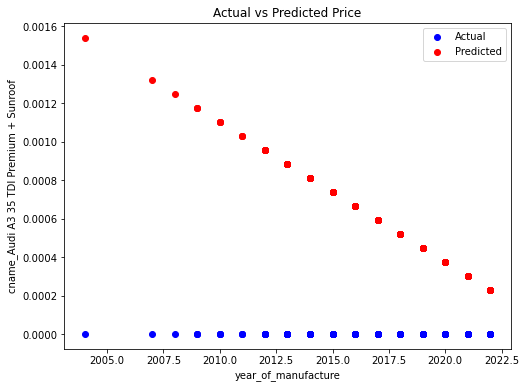

In [80]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have a DataFrame 'data' with columns 'kms_driven' and 'price'
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['year_of_manufacture']], data['cname_Audi A3 35 TDI Premium + Sunroof'], test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Visualize the results using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('year_of_manufacture')
plt.ylabel('cname_Audi A3 35 TDI Premium + Sunroof')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()
